**Zad. 1**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

**Zad.1 pkt. 1.1**

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

features = data.feature_names
X = df[features]
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Zad.1 pkt. 1.2**

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Zad.1 pkt. 1.3**

In [ ]:
print("Główne składowe:\n", pca.components_)

Główne składowe:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


**Zad.1 pkt. 1.4**

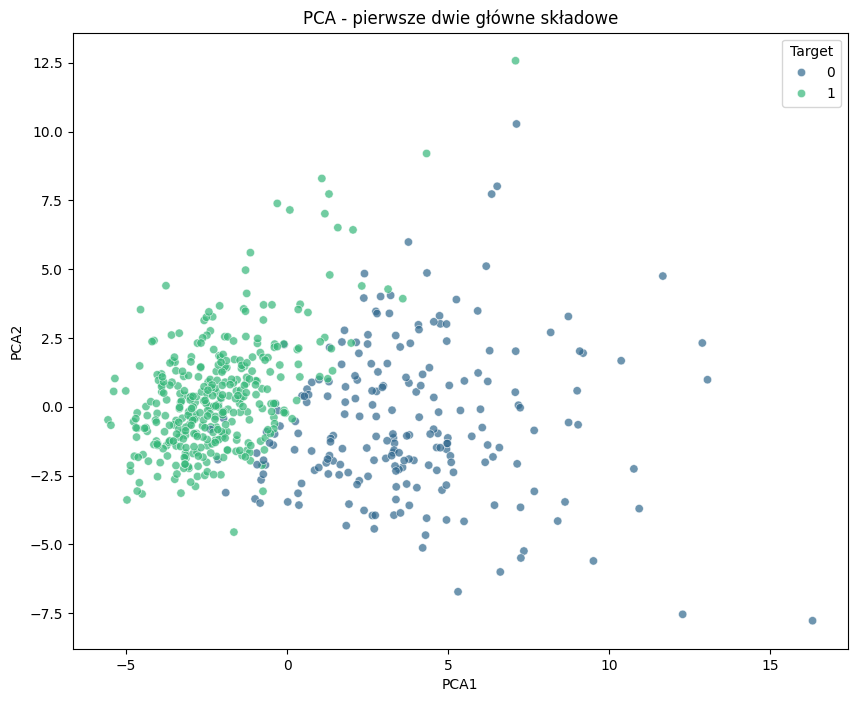

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title("PCA - pierwsze dwie główne składowe")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title='Target')
plt.show()

**Zad.1 pkt. 1.5**

Macierz składowych głównych:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


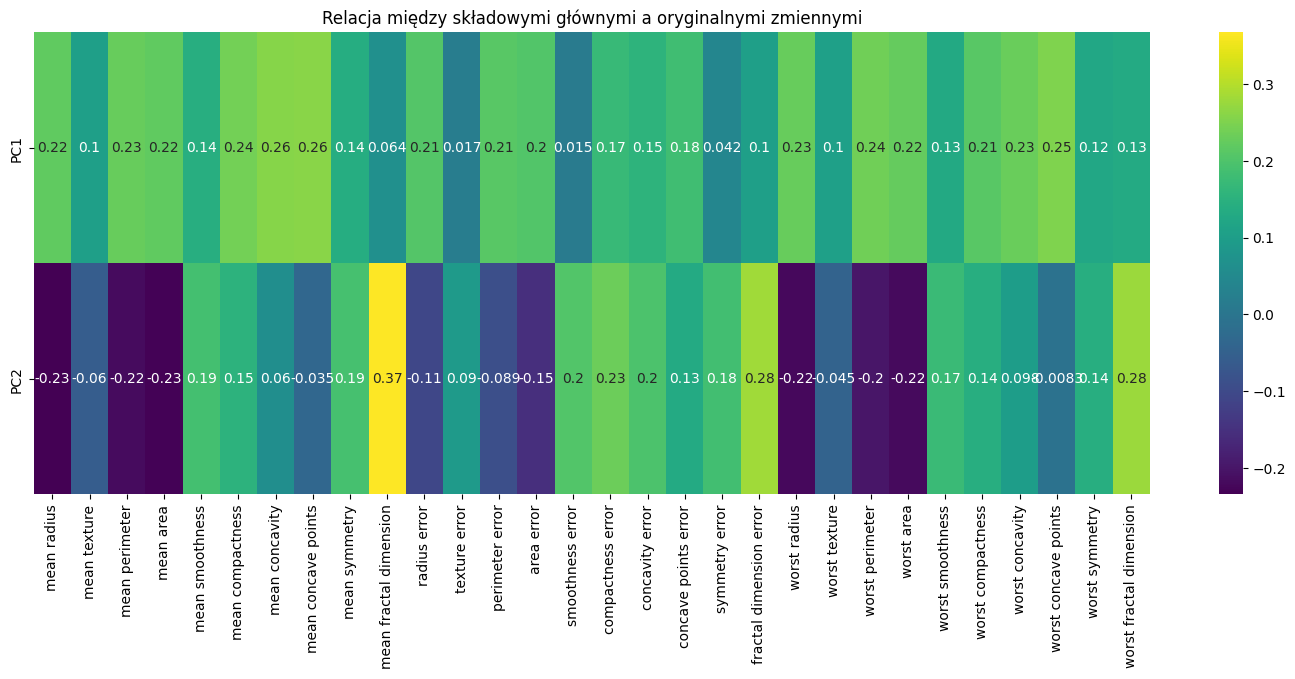

In [ ]:
print("Macierz składowych głównych:\n", pca.components_)

# Mapa cieplna - relacje między składowymi głównymi a oryginalnymi zmiennymi
plt.figure(figsize=(18, 6))
sns.heatmap(pca.components_, annot=True, cmap='viridis', xticklabels=features, yticklabels=['PC1', 'PC2'])
plt.title("Relacja między składowymi głównymi a oryginalnymi zmiennymi")
plt.show()

**Zad.1 pkt. 1.6**

Wariancja wyjaśniana przez PC1 i PC2: [0.44272026 0.18971182]
Całkowita wariancja wyjaśniana przez PC1 i PC2: 0.6324320765155944
Liczba składowych dla 95% wariancji: 10
Liczba składowych dla 99% wariancji: 17


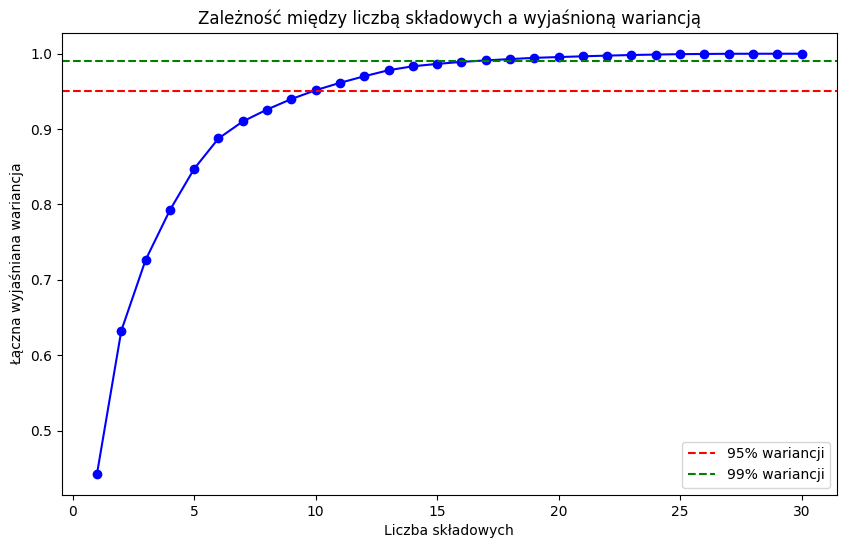

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Wariancja wyjaśniana przez PC1 i PC2:", explained_variance_ratio)
print("Całkowita wariancja wyjaśniana przez PC1 i PC2:", explained_variance_ratio.sum())

# Liczba składowych dla wyjaśnienia 95% i 99% wariancji
pca_full = PCA().fit(X_scaled)
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
n_components_99 = (cumulative_variance >= 0.99).argmax() + 1
print(f"Liczba składowych dla 95% wariancji: {n_components_95}")
print(f"Liczba składowych dla 99% wariancji: {n_components_99}")

# Wykres liczby składowych vs. wyjaśniana wariancja
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% wariancji')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% wariancji')
plt.title("Zależność między liczbą składowych a wyjaśnioną wariancją")
plt.xlabel("Liczba składowych")
plt.ylabel("Łączna wyjaśniana wariancja")
plt.legend()
plt.show()

**Zad.1 pkt. 1.7**

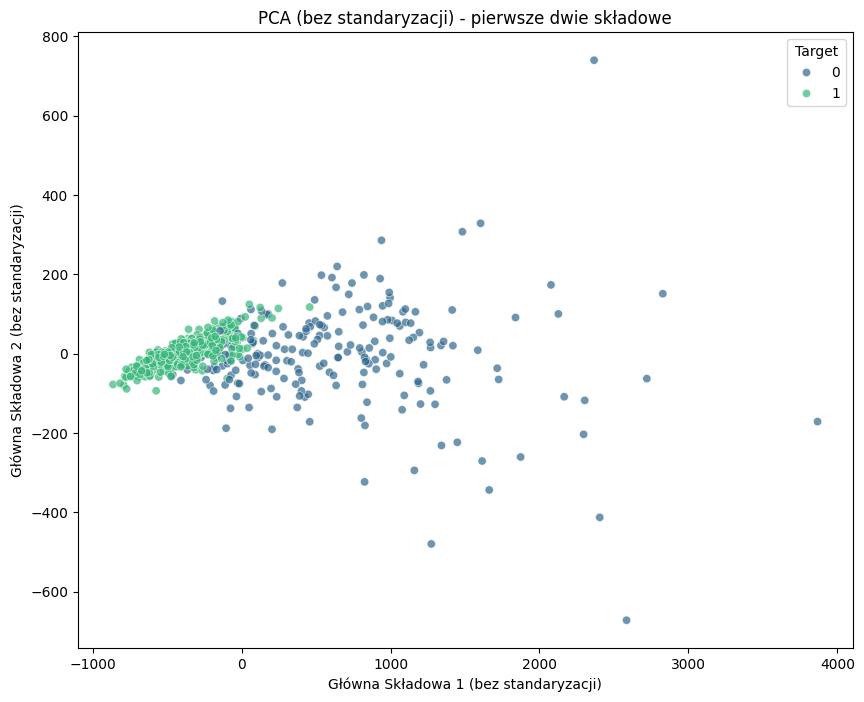

In [ ]:
pca_unscaled = PCA()
X_pca_unscaled = pca_unscaled.fit_transform(X)

# Wykres dla danych niestandaryzowanych
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_unscaled[:, 0], y=X_pca_unscaled[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title("PCA (bez standaryzacji) - pierwsze dwie składowe")
plt.xlabel("Główna Składowa 1 (bez standaryzacji)")
plt.ylabel("Główna Składowa 2 (bez standaryzacji)")
plt.legend(title='Target')
plt.show()

Macierz składowych głównych:
 [[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.570428

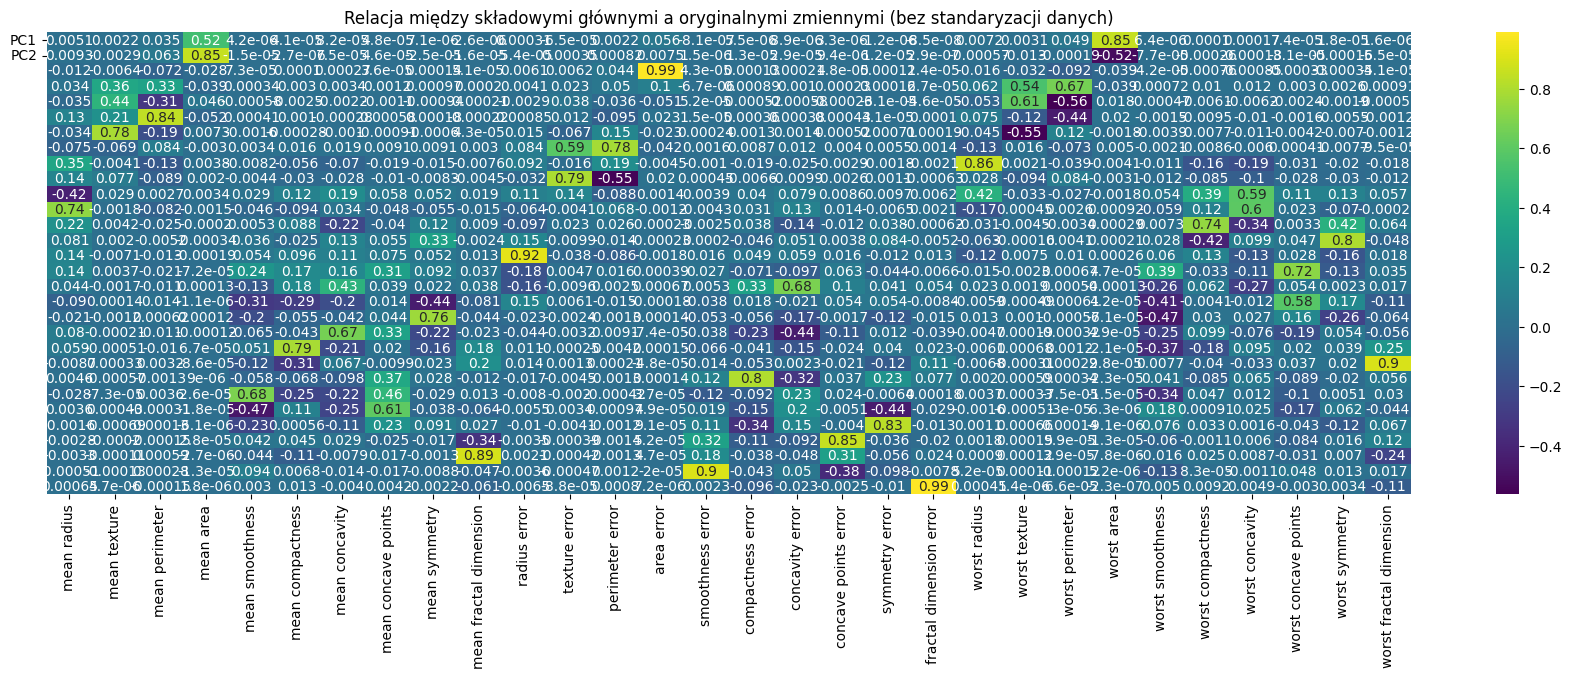

In [ ]:
print("Macierz składowych głównych:\n", pca_unscaled.components_)

# Mapa cieplna - relacje między składowymi głównymi a oryginalnymi zmiennymi
plt.figure(figsize=(22, 6))
sns.heatmap(pca_unscaled.components_, annot=True, cmap='viridis', xticklabels=features, yticklabels=['PC1', 'PC2'])
plt.title("Relacja między składowymi głównymi a oryginalnymi zmiennymi (bez standaryzacji danych)")
plt.show()

Wariancja wyjaśniana przez PC1 i PC2: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908878e-08
 6.99641648e-09 4.78318305e-09 2.93549213e-09 1.41684926e-09
 8.29577731e-10 5.20405880e-10 4.08463983e-10 3.63313376e-10
 1.72849736e-10 1.27487508e-10 7.72682973e-11 6.28357715e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666944e-12 1.55344680e-12]
Całkowita wariancja wyjaśniana przez PC1 i PC2: 0.9999999999999997
Liczba składowych dla 95% wariancji: 1
Liczba składowych dla 99% wariancji: 2


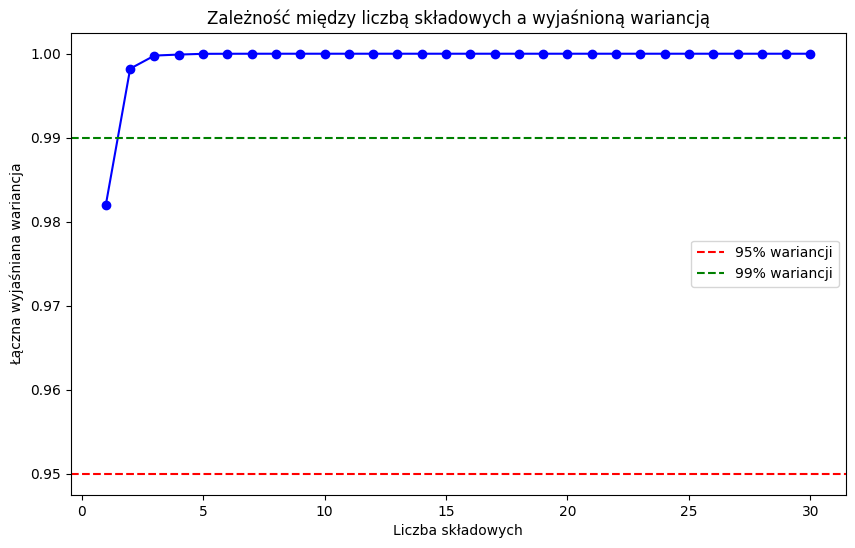

In [ ]:
explained_variance_ratio_unscaled = pca_unscaled.explained_variance_ratio_
print("Wariancja wyjaśniana przez PC1 i PC2:", explained_variance_ratio_unscaled)
print("Całkowita wariancja wyjaśniana przez PC1 i PC2:", explained_variance_ratio_unscaled.sum())

# Liczba składowych dla wyjaśnienia 95% i 99% wariancji
pca_unscaled_full = PCA().fit(X_pca_unscaled)
cumulative_variance_unscaled = pca_unscaled_full.explained_variance_ratio_.cumsum()
n_components_95_unscaled = (cumulative_variance_unscaled >= 0.95).argmax() + 1
n_components_99_unscaled = (cumulative_variance_unscaled >= 0.99).argmax() + 1
print(f"Liczba składowych dla 95% wariancji: {n_components_95_unscaled}")
print(f"Liczba składowych dla 99% wariancji: {n_components_99_unscaled}")

# Wykres liczby składowych vs. wyjaśniana wariancja
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_unscaled)+1), cumulative_variance_unscaled, marker='o', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% wariancji')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% wariancji')
plt.title("Zależność między liczbą składowych a wyjaśnioną wariancją")
plt.xlabel("Liczba składowych")
plt.ylabel("Łączna wyjaśniana wariancja")
plt.legend()
plt.show()

Liczba składowych dla 95% wariancji (dane zestandaryzowane): 10
Liczba składowych dla 99% wariancji (dane zestandaryzowane): 17
Liczba składowych dla 95% wariancji (dane oryginalne): 1
Liczba składowych dla 99% wariancji (dane oryginalne): 2


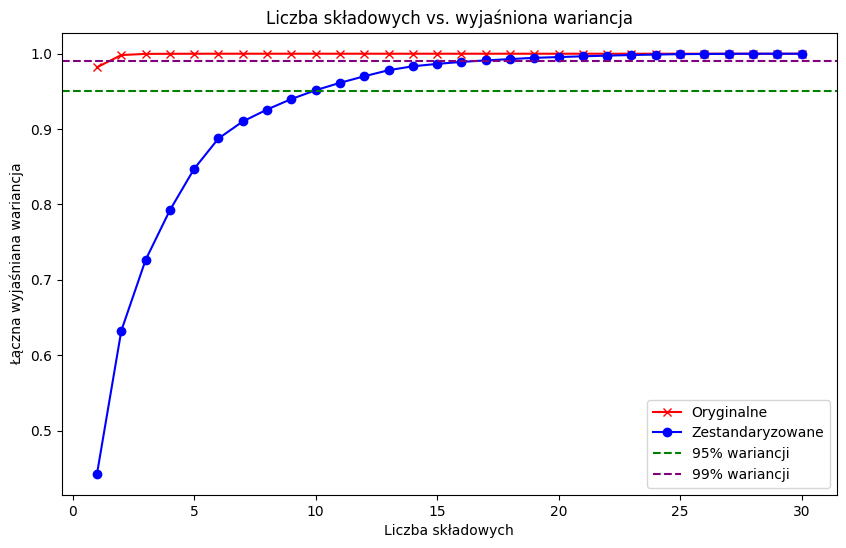

In [ ]:
# Liczba składowych potrzebnych dla 95% i 99% wariancji - dane zestandaryzowane
cumulative_variance_standardized = cumulative_variance
n_components_95_standardized = (cumulative_variance_standardized >= 0.95).argmax() + 1
n_components_99_standardized = (cumulative_variance_standardized >= 0.99).argmax() + 1
print(f"Liczba składowych dla 95% wariancji (dane zestandaryzowane): {n_components_95_standardized}")
print(f"Liczba składowych dla 99% wariancji (dane zestandaryzowane): {n_components_99_standardized}")

# Liczba składowych potrzebnych dla 95% i 99% wariancji - dane oryginalne
cumulative_variance_unscaled = pca_unscaled.explained_variance_ratio_.cumsum()
n_components_95_unscaled = (cumulative_variance_unscaled >= 0.95).argmax() + 1
n_components_99_unscaled = (cumulative_variance_unscaled >= 0.99).argmax() + 1
print(f"Liczba składowych dla 95% wariancji (dane oryginalne): {n_components_95_unscaled}")
print(f"Liczba składowych dla 99% wariancji (dane oryginalne): {n_components_99_unscaled}")

# Wykres zależności liczby składowych od wyjaśnionej wariancji - dane zestandaryzowane i oryginalne
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_unscaled)+1), cumulative_variance_unscaled, marker='x', color='r', label="Oryginalne")
plt.plot(range(1, len(cumulative_variance_standardized)+1), cumulative_variance_standardized, marker='o', color='b', label="Zestandaryzowane")
plt.axhline(y=0.95, color='g', linestyle='--', label='95% wariancji')
plt.axhline(y=0.99, color='purple', linestyle='--', label='99% wariancji')
plt.title("Liczba składowych vs. wyjaśniona wariancja")
plt.xlabel("Liczba składowych")
plt.ylabel("Łączna wyjaśniana wariancja")
plt.legend()
plt.show()


**Zad.2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('digits.csv')

**Zad.2.1.1**

In [ ]:
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pixel_0_0     1797 non-null   float64
 1   pixel_0_1     1797 non-null   float64
 2   pixel_0_2     1797 non-null   float64
 3   pixel_0_3     1797 non-null   float64
 4   pixel_0_4     1797 non-null   float64
 5   pixel_0_5     1797 non-null   float64
 6   pixel_0_6     1797 non-null   float64
 7   pixel_0_7     1797 non-null   float64
 8   pixel_1_0     1797 non-null   float64
 9   pixel_1_1     1797 non-null   float64
 10  pixel_1_2     1797 non-null   float64
 11  pixel_1_3     1797 non-null   float64
 12  pixel_1_4     1797 non-null   float64
 13  pixel_1_5     1797 non-null   float64
 14  pixel_1_6     1797 non-null   float64
 15  pixel_1_7     1797 non-null   float64
 16  pixel_2_0     1797 non-null   float64
 17  pixel_2_1     1797 non-null   float64
 18  pixel_2_2     1797 non-null 

**Zad.2.1.2**

In [ ]:
df_pixels = data.drop(columns=['number_label'])
y_labels = data['number_label']

**Zad.2.1.3**

In [ ]:
sample_digit = df_pixels.iloc[0].values.reshape(8, 8)
print("Reprezentacja pierwszej cyfry:")
print(sample_digit)

Reprezentacja pierwszej cyfry:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


**Zad.2.1.4**

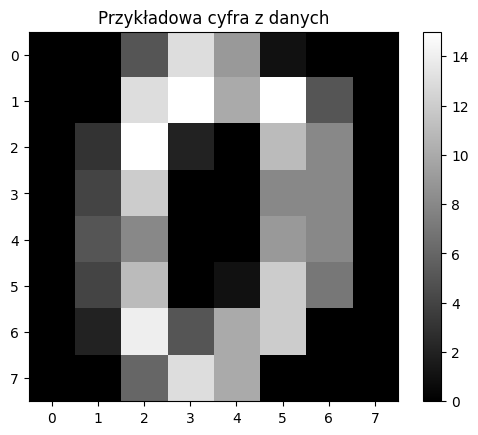

In [ ]:
plt.imshow(sample_digit, cmap='gray')
plt.colorbar()
plt.title("Przykładowa cyfra z danych")
plt.show()


**Zad.2.2.1**

In [ ]:
scaler = StandardScaler()
df_pixels_scaled = scaler.fit_transform(df_pixels)
# df_pixels_scaled['numer_label'] = y_labels
# df_pixels_scaled.describe()

**Zad.2.2.2-3**

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(df_pixels_scaled)

**Zad.2.2.4**

In [ ]:
print("Składowe PCA (components_):")
print(pca_2d.components_)


Składowe PCA (components_):
[[-0.          0.18223392  0.285868    0.22036967 -0.02516956 -0.00949725
  -0.0524765  -0.06269499  0.03470727  0.24553368  0.22915174 -0.10794381
   0.03620209  0.03871159 -0.08378077 -0.09277502  0.01669934  0.1367165
  -0.06305075 -0.12287927  0.14819348 -0.02348425 -0.1711997  -0.10420837
  -0.00394882 -0.1163897  -0.18820473  0.0658604   0.14353257 -0.12820705
  -0.18062075 -0.05270917 -0.         -0.23890251 -0.23500613 -0.00509137
  -0.01310881 -0.15911618 -0.12939416 -0.         -0.05559906 -0.18715707
  -0.15353371 -0.04682572 -0.11089272 -0.10720947  0.01792652 -0.00227271
  -0.02881729  0.040868    0.11027068  0.0318244  -0.07904945  0.06832147
   0.12124707  0.04877119 -0.00183586  0.16039569  0.27985301  0.19444929
   0.01777381  0.103198    0.1198106   0.07149362]
 [ 0.          0.04702701  0.0595648  -0.02080385  0.15590316  0.27413299
   0.24973251  0.14583207 -0.00102721  0.02761909  0.01450474 -0.09225537
   0.0572917   0.21410852  0.26653

**Zad.2.2.5-6**

In [ ]:
explained_variance_2d = pca_2d.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez PC1 i PC2: {explained_variance_2d}")
print(f"Całkowita wariancja wyjaśniana przez dwie składowe: {explained_variance_2d.sum()}")


Wariancja wyjaśniana przez PC1 i PC2: [0.12033916 0.09561054]
Całkowita wariancja wyjaśniana przez dwie składowe: 0.21594970500832805


**Zad.2.2.7**

In [ ]:
pca_full = PCA()
pca_full.fit(df_pixels_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
n_components_99 = (cumulative_variance >= 0.99).argmax() + 1

print(f"Liczba składowych dla 95% wariancji: {n_components_95}")
print(f"Liczba składowych dla 99% wariancji: {n_components_99}")


Liczba składowych dla 95% wariancji: 40
Liczba składowych dla 99% wariancji: 54


**Zad.2.2.8**

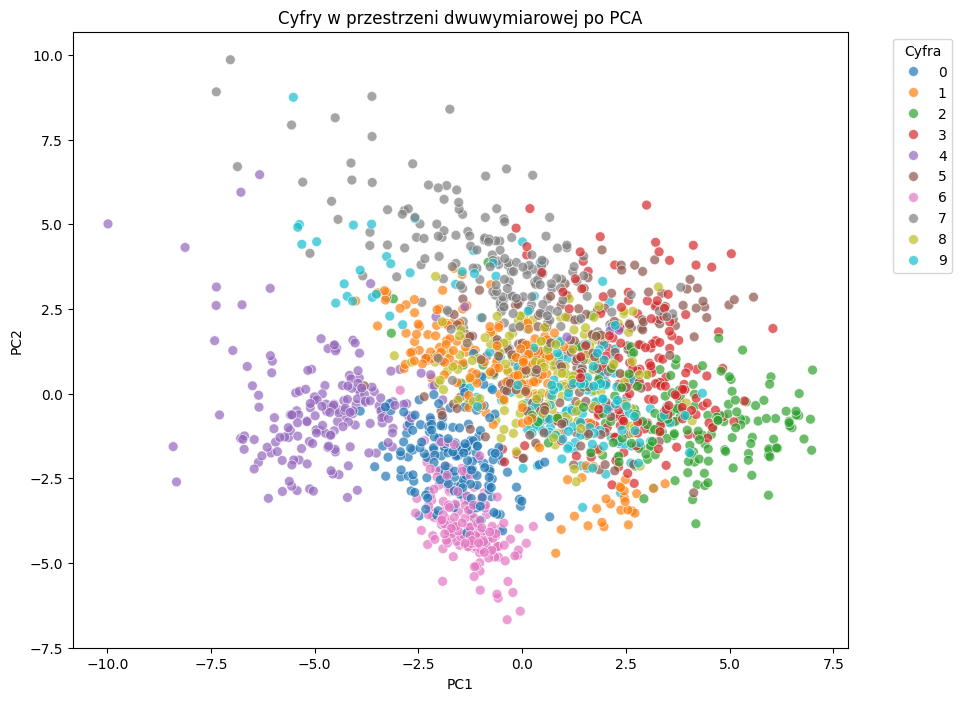

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y_labels, palette='tab10', s=50, alpha=0.7)
plt.title("Cyfry w przestrzeni dwuwymiarowej po PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cyfra', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Liczba składowych dla 95% wariancji (dane zestandaryzowane): 40
Liczba składowych dla 99% wariancji (dane zestandaryzowane): 54


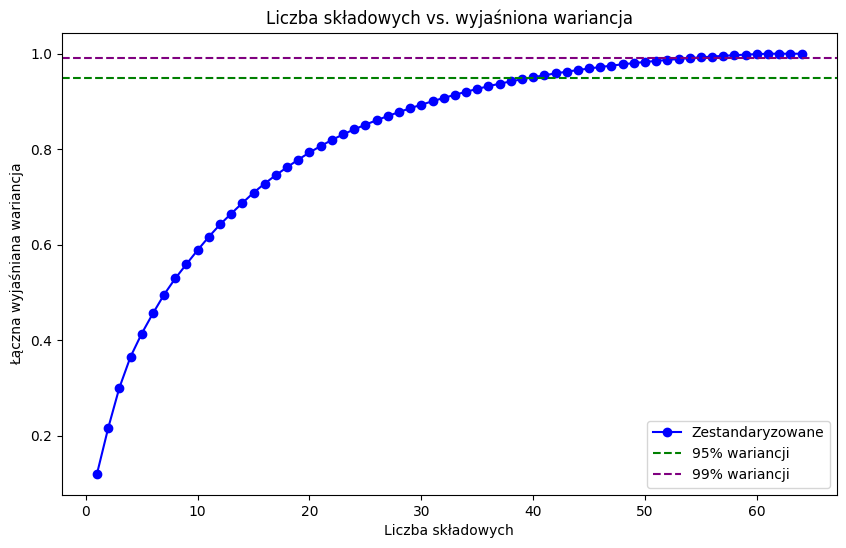

In [ ]:
cumulative_variance = pca_full.explained_variance_ratio_.cumsum()
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
n_components_99 = (cumulative_variance >= 0.99).argmax() + 1
print(f"Liczba składowych dla 95% wariancji (dane zestandaryzowane): {n_components_95}")
print(f"Liczba składowych dla 99% wariancji (dane zestandaryzowane): {n_components_99}")

# Wykres zależności liczby składowych od wyjaśnionej wariancji - dane zestandaryzowane i oryginalne
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='b', label="Zestandaryzowane")
plt.axhline(y=0.95, color='g', linestyle='--', label='95% wariancji')
plt.axhline(y=0.99, color='purple', linestyle='--', label='99% wariancji')
plt.title("Liczba składowych vs. wyjaśniona wariancja")
plt.xlabel("Liczba składowych")
plt.ylabel("Łączna wyjaśniana wariancja")
plt.legend()
plt.show()

**Zad. 2.3**

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(df_pixels_scaled)

In [ ]:
explained_variance_3d = pca_3d.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez trzy składowe: {explained_variance_3d}")
print(f"Całkowita wariancja dla trzech składowych: {explained_variance_3d.sum()}")


Wariancja wyjaśniana przez trzy składowe: [0.12033916 0.09561054 0.08444415]
Całkowita wariancja dla trzech składowych: 0.3003938539345735


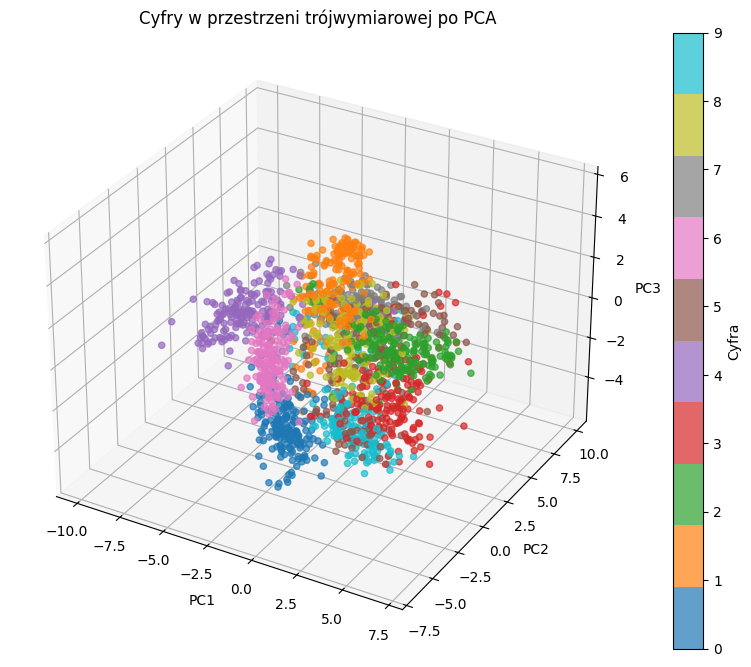

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_labels, cmap='tab10', s=20, alpha=0.7)
plt.colorbar(sc, ax=ax, label='Cyfra')
ax.set_title("Cyfry w przestrzeni trójwymiarowej po PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


**Zad. 2.4**

Dane oryginalne - Wariancja dla PC1 i PC2: [0.14890594 0.13618771]
Całkowita wariancja (bez standaryzacji): 0.28509364823699285


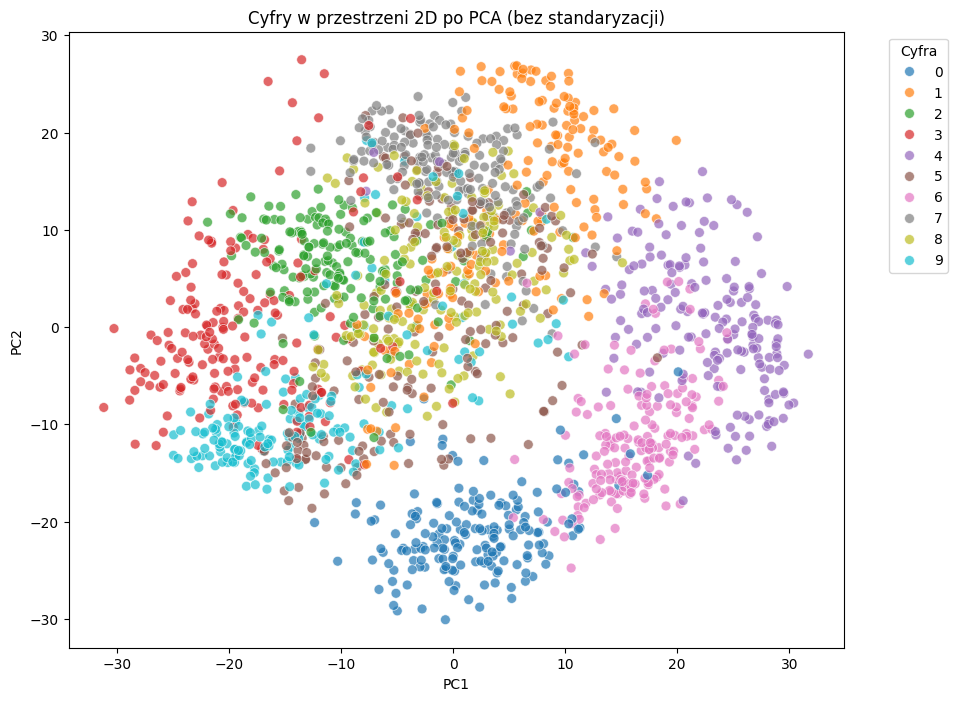

In [ ]:
# PCA bez standaryzacji
pca_2d_unscaled = PCA(n_components=2)
X_pca_2d_unscaled = pca_2d_unscaled.fit_transform(df_pixels)

explained_variance_2d_unscaled = pca_2d_unscaled.explained_variance_ratio_
print("Dane oryginalne - Wariancja dla PC1 i PC2:", explained_variance_2d_unscaled)
print("Całkowita wariancja (bez standaryzacji):", explained_variance_2d_unscaled.sum())

# Wizualizacja w 2D (dane niestandaryzowane)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca_2d_unscaled[:, 0], y=X_pca_2d_unscaled[:, 1], hue=y_labels, palette='tab10', s=50, alpha=0.7)
plt.title("Cyfry w przestrzeni 2D po PCA (bez standaryzacji)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cyfra', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Liczba składowych dla 95% wariancji (dane oryginalne): 29
Liczba składowych dla 99% wariancji (dane oryginalne): 41


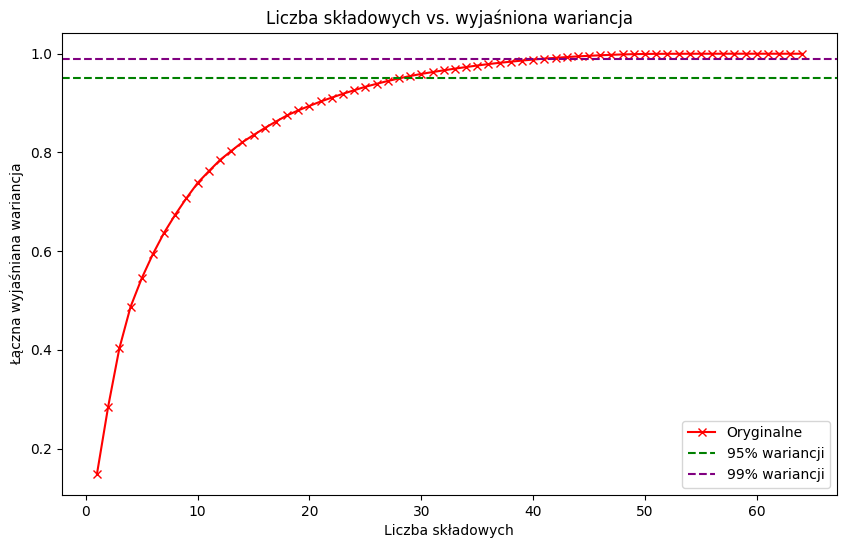

In [ ]:
pca_original = PCA()
X_pca_original = pca_original.fit_transform(df_pixels)
# Liczba składowych potrzebnych dla 95% i 99% wariancji - dane oryginalne
cumulative_variance_unscaled = pca_original.explained_variance_ratio_.cumsum()
n_components_95_unscaled = (cumulative_variance_unscaled >= 0.95).argmax() + 1
n_components_99_unscaled = (cumulative_variance_unscaled >= 0.99).argmax() + 1
print(f"Liczba składowych dla 95% wariancji (dane oryginalne): {n_components_95_unscaled}")
print(f"Liczba składowych dla 99% wariancji (dane oryginalne): {n_components_99_unscaled}")

# Wykres zależności liczby składowych od wyjaśnionej wariancji - dane zestandaryzowane i oryginalne
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_unscaled)+1), cumulative_variance_unscaled, marker='x', color='r', label="Oryginalne")
plt.axhline(y=0.95, color='g', linestyle='--', label='95% wariancji')
plt.axhline(y=0.99, color='purple', linestyle='--', label='99% wariancji')
plt.title("Liczba składowych vs. wyjaśniona wariancja")
plt.xlabel("Liczba składowych")
plt.ylabel("Łączna wyjaśniana wariancja")
plt.legend()
plt.show()

Wariancja wyjaśniana przez poszczególne składowe (PC1, PC2, PC3): [0.14890594 0.13618771 0.11794594]
Suma wariancji wyjaśnionej przez trzy składowe: 40.30%


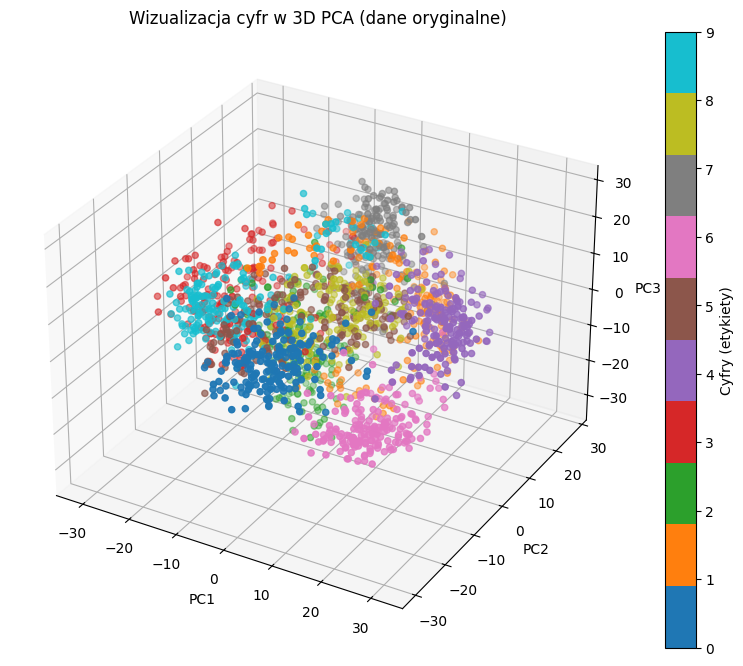

In [ ]:
pca_3d_original = PCA(n_components=3)
X_pca_3d_original = pca_3d_original.fit_transform(df_pixels)

explained_variance_3d_original = pca_3d_original.explained_variance_ratio_
print(f"Wariancja wyjaśniana przez poszczególne składowe (PC1, PC2, PC3): {explained_variance_3d_original}")
print(f"Suma wariancji wyjaśnionej przez trzy składowe: {explained_variance_3d_original.sum() * 100:.2f}%")


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d_original[:, 0], X_pca_3d_original[:, 1], X_pca_3d_original[:, 2], c=y_labels, cmap='tab10')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Wizualizacja cyfr w 3D PCA (dane oryginalne)")
plt.colorbar(scatter, ax=ax, label="Cyfry (etykiety)")
plt.show()

Liczba składowych dla 95% wariancji (dane zestandaryzowane): 40
Liczba składowych dla 99% wariancji (dane zestandaryzowane): 54
Liczba składowych dla 95% wariancji (dane oryginalne): 29
Liczba składowych dla 99% wariancji (dane oryginalne): 41


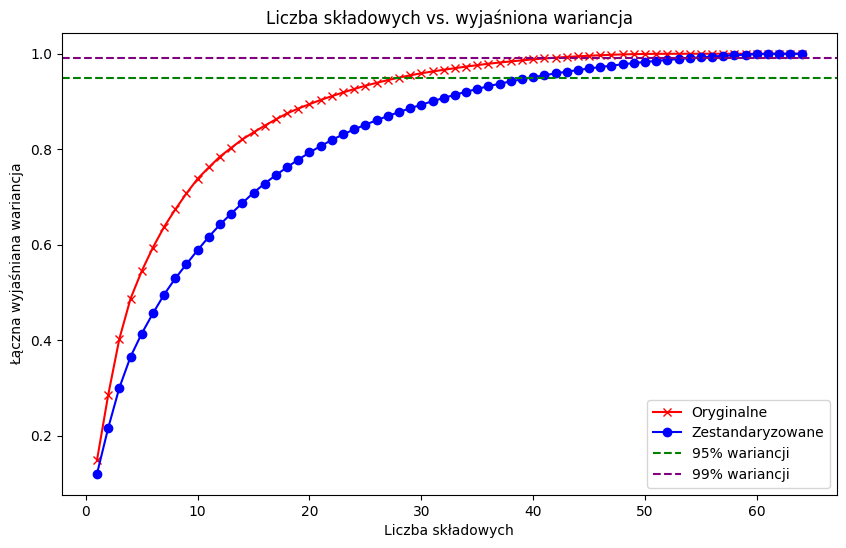

In [ ]:
# Liczba składowych potrzebnych dla 95% i 99% wariancji - dane zestandaryzowane
cumulative_variance_standardized = cumulative_variance
n_components_95_standardized = (cumulative_variance_standardized >= 0.95).argmax() + 1
n_components_99_standardized = (cumulative_variance_standardized >= 0.99).argmax() + 1
print(f"Liczba składowych dla 95% wariancji (dane zestandaryzowane): {n_components_95_standardized}")
print(f"Liczba składowych dla 99% wariancji (dane zestandaryzowane): {n_components_99_standardized}")

print(f"Liczba składowych dla 95% wariancji (dane oryginalne): {n_components_95_unscaled}")
print(f"Liczba składowych dla 99% wariancji (dane oryginalne): {n_components_99_unscaled}")

# Wykres zależności liczby składowych od wyjaśnionej wariancji - dane zestandaryzowane i oryginalne
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_unscaled)+1), cumulative_variance_unscaled, marker='x', color='r', label="Oryginalne")
plt.plot(range(1, len(cumulative_variance_standardized)+1), cumulative_variance_standardized, marker='o', color='b', label="Zestandaryzowane")
plt.axhline(y=0.95, color='g', linestyle='--', label='95% wariancji')
plt.axhline(y=0.99, color='purple', linestyle='--', label='99% wariancji')
plt.title("Liczba składowych vs. wyjaśniona wariancja")
plt.xlabel("Liczba składowych")
plt.ylabel("Łączna wyjaśniana wariancja")
plt.legend()
plt.show()
